In [1]:
import pandas as pd
import urllib
# the service URL
livechart = "https://nds.iaea.org/relnsd/v1/data?"

# There have been cases in which the service returns an HTTP Error 403: Forbidden
# use this workaround
import urllib.request
def lc_pd_dataframe(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    return pd.read_csv(urllib.request.urlopen(req))

In [2]:
df = lc_pd_dataframe(livechart + "fields=decay_rads&nuclides=237pu&rad_types=a")

In [22]:
df

,energy,unc_en,intensity,unc_i,daughter_level_hl,daughter_level_energy,hindrance_factor,unc_hf,p_z,p_n,...,decay_%,unc_d,q,unc_q,d_z,d_n,d_symbol,ensdf_publication_cut-off,ensdf_authors,Extraction_date
0,5089.1,3.1,0.000021,0.000002,NaN,561.400,17.0,1.700,94,143,...,0.0042,0.0004,5747.6,23,92,141,U,8-Oct-2020,B. Singh and J. K. Tuli and E. Browne,2024-04-29
1,5147.1,2.4,0.000231,0.000022,NaN,503.610,3.6,0.036,94,143,...,0.0042,0.0004,5747.6,23,92,141,U,8-Oct-2020,B. Singh and J. K. Tuli and E. Browne,2024-04-29
2,5253.2,2.4,0.000029,0.000003,NaN,397.570,140.0,NaN,94,143,...,0.0042,0.0004,5747.6,23,92,141,U,8-Oct-2020,B. Singh and J. K. Tuli and E. Browne,2024-04-29
3,5296.9,2.4,0.000512,0.000049,NaN,353.810,13.0,1.300,94,143,...,0.0042,0.0004,5747.6,23,92,141,U,8-Oct-2020,B. Singh and J. K. Tuli and E. Browne,2024-04-29
4,5329.9,2.4,0.001877,0.000180,NaN,320.740,5.8,0.058,94,143,...,0.0042,0.0004,5747.6,23,92,141,U,8-Oct-2020,B. Singh and J. K. Tuli and E. Browne,2024-04-29
5,5351.8,2.4,0.000731,0.000070,NaN,298.750,20.0,2.000,94,143,...,0.0042,0.0004,5747.6,23,92,141,U,8-Oct-2020,B. Singh and J. K. Tuli and E. Browne,2024-04-29
6,5495.5,2.4,0.000031,0.000003,NaN,155.310,3130.0,400.000,94,143,...,0.0042,0.0004,5747.6,23,92,141,U,8-Oct-2020,B. Singh and J. K. Tuli and E. Browne,2024-04-29
7,5558.6,2.4,0.000118,0.000011,NaN,92.170,1860.0,60.000,94,143,...,0.0042,0.0004,5747.6,23,92,141,U,8-Oct-2020,B. Singh and J. K. Tuli and E. Browne,2024-04-29
8,5610.3,2.3,0.000269,0.000026,NaN,40.349,1570.0,30.000,94,143,...,0.0042,0.0004,5747.6,23,92,141,U,8-Oct-2020,B. Singh and J. K. Tuli and E. Browne,2024-04-29
9,5650.6,2.3,0.000277,0.000027,NaN,0.000,2550.0,40.000,94,143,...,0.0042,0.0004,5747.6,23,92,141,U,8-Oct-2020,B. Singh and J. K. Tuli and E. Browne,2024-04-29


In [46]:
# print(data_Al1.columns.values)
# print()
# formatters = {'mass density':lambda x: f'{x:.3f}',
#               'net count rate':lambda x: f'{x:.1f}',
#               'count rate error':lambda x: f'{x:.1f}'}
# data_Al1_report = data_Al1[['mass density','count','net count rate','count rate error']]
# columns=[r'质量厚度($\mathrm{{g/cm^2}}$)','总计数',r'净计数率($\mathrm{{Bq}}$)',r'误差($\mathrm{{Bq}}$)']
# print(data_Al1_report.to_latex(header=columns,
#                                formatters=formatters,
#                                index=False,
#                                column_format='cccc',
#                                caption=r'\ce{Al} 吸收曲线：几何条件为靠近探测器，本底计数为 3341，本底和总计数测量时间均为 200$\operatorname{s}$',
#                                label='tab:Al1',
#                                position='H'))
formatters = {'energy':lambda x: f'{x:.0f}',
              'intensity':lambda x: f'{x*1e3:.4f}'}
print(df.to_latex(columns=['energy','intensity'],
                  header=[r'衰变能(\unit{{keV}})',r'相对强度\%(\num{{e-3}})'],
                  formatters=formatters,
                  column_format='ccc',
                  caption=r'\(\alpha\)衰变模式',
                  label='tab:alpha_decay',
                  position='H'))
df['half_life'][0]


\begin{table}[H]
\caption{\(\alpha\)衰变模式}
\label{tab:alpha_decay}
\begin{tabular}{ccc}
\toprule
 & 衰变能(\unit{keV}) & 相对强度\%(\num{e-3}) \\
\midrule
0 & 5089 & 0.0210 \\
1 & 5147 & 0.2310 \\
2 & 5253 & 0.0294 \\
3 & 5297 & 0.5124 \\
4 & 5330 & 1.8774 \\
5 & 5352 & 0.7308 \\
6 & 5496 & 0.0315 \\
7 & 5559 & 0.1176 \\
8 & 5610 & 0.2688 \\
9 & 5651 & 0.2772 \\
\bottomrule
\end{tabular}
\end{table}



45.64

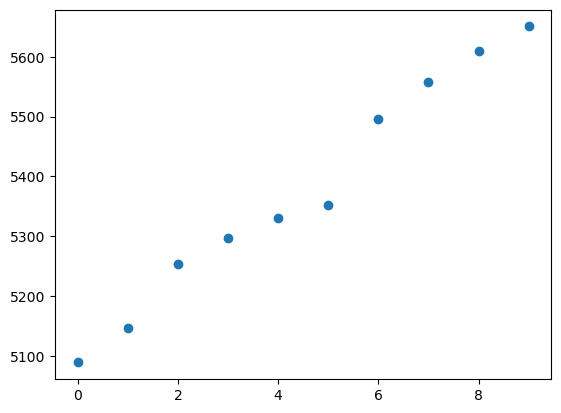

In [18]:
import matplotlib.pyplot as plt
plt.plot(ene,'o')